C:\Users\Vikram\AppData\Local\Temp\ipykernel_5376\3040417522.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("m2tr_best_model.pth"))


Confusion Matrix:
 [[9 0]
 [0 0]]


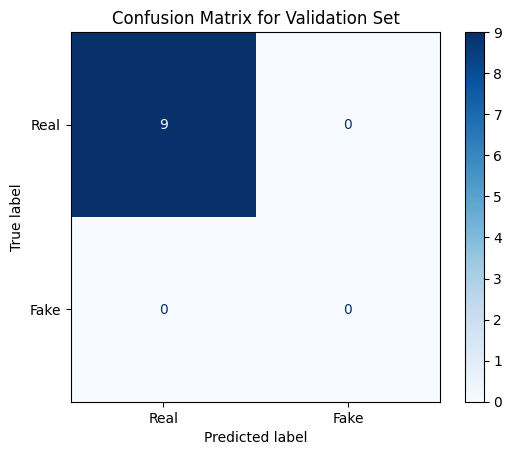

In [3]:
import torch
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn

# Define the SimpleResNet model
class SimpleResNet(nn.Module):
    def __init__(self, num_classes=2):
        super(SimpleResNet, self).__init__()
        self.backbone = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        self.backbone.fc = nn.Linear(self.backbone.fc.in_features, num_classes)

    def forward(self, x):
        return self.backbone(x)

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Validation Dataset
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

val_dataset = datasets.ImageFolder("C:/Users/Vikram/DFDC/data/final/val", transform=transform)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)

# Load the best model
model = SimpleResNet(num_classes=2).to(device)
model.load_state_dict(torch.load("m2tr_best_model.pth"))
model.eval()  # Set the model to evaluation mode

# Predict on Validation Set
all_preds = []
all_labels = []

with torch.no_grad():  # Disable gradient computation
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)  # Get the predicted class
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Generate Confusion Matrix
cm = confusion_matrix(all_labels, all_preds, labels=[0, 1])  # Adjust for your class labels
print("Confusion Matrix:\n", cm)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real", "Fake"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Validation Set")
plt.show()
